# Trabalho Prático - Aprendizado de Máquina Não Supervisionado
## Clustering com dataset Iris

Vamos explorar algoritmos de clustering para identificar grupos naturais no dataset Iris.

### 1. Importando bibliotecas e carregando dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

/home/augusto/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv('trabalho1/data/iris.data', header=None, names=column_names)
print(f"Dataset carregado: {data.shape}")
data.head()

Dataset carregado: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Pré-processamento e Análise Exploratória

Primeiro vamos separar as features e normalizar os dados.

In [3]:
features = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
true_labels = data['class']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Vamos visualizar os dados para identificar quantos grupos naturais conseguimos ver.

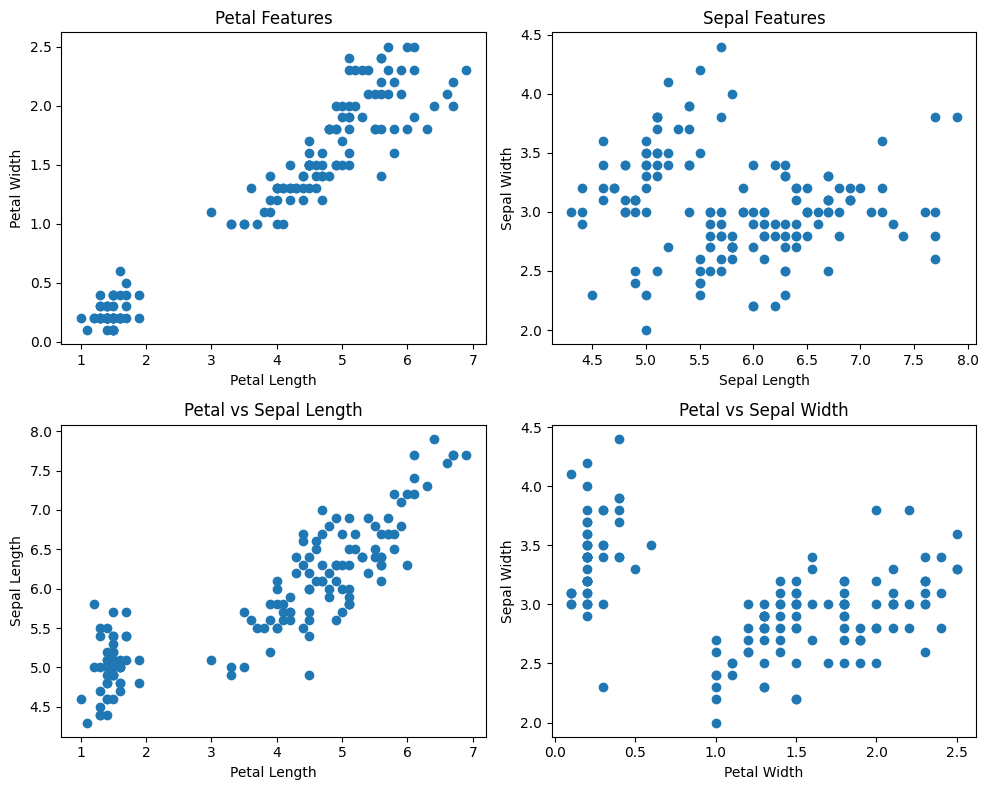

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(features['petal_length'], features['petal_width'])
axes[0, 0].set_xlabel('Petal Length')
axes[0, 0].set_ylabel('Petal Width')
axes[0, 0].set_title('Petal Features')

axes[0, 1].scatter(features['sepal_length'], features['sepal_width'])
axes[0, 1].set_xlabel('Sepal Length')
axes[0, 1].set_ylabel('Sepal Width')
axes[0, 1].set_title('Sepal Features')

axes[1, 0].scatter(features['petal_length'], features['sepal_length'])
axes[1, 0].set_xlabel('Petal Length')
axes[1, 0].set_ylabel('Sepal Length')
axes[1, 0].set_title('Petal vs Sepal Length')

axes[1, 1].scatter(features['petal_width'], features['sepal_width'])
axes[1, 1].set_xlabel('Petal Width')
axes[1, 1].set_ylabel('Sepal Width')
axes[1, 1].set_title('Petal vs Sepal Width')

plt.tight_layout()
plt.show()

**Resposta:** Olhando os gráficos, consigo identificar visualmente 2 ou 3 grupos naturais. Nas features de pétala (primeiro gráfico), vejo claramente 2 grupos bem separados, sendo que um deles parece ter uma subdivisão. Já nas features de sépala, os grupos estão mais misturados.

### 3. K-Means Clustering

#### 3.1 Método do Cotovelo

In [5]:
inertias = []
silhouette_scores = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)
    
    if k > 1:
        score = silhouette_score(features_scaled, kmeans.labels_)
        silhouette_scores.append(score)

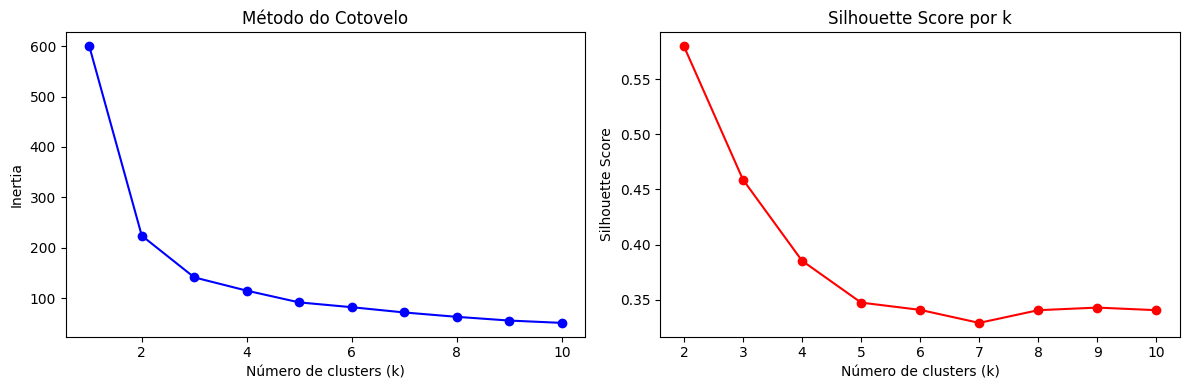

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(K, inertias, 'bo-')
ax1.set_xlabel('Número de clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Método do Cotovelo')

ax2.plot(range(2, 11), silhouette_scores, 'ro-')
ax2.set_xlabel('Número de clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por k')

plt.tight_layout()
plt.show()

**Análise:** O método do cotovelo sugere k=2 ou k=3 como valores ótimos. O silhouette score também mostra valores altos para k=2 e k=3.

#### 3.2 Aplicando K-Means com k=3

In [7]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans_3.fit_predict(features_scaled)

#### 3.3 Visualizando os clusters do K-Means

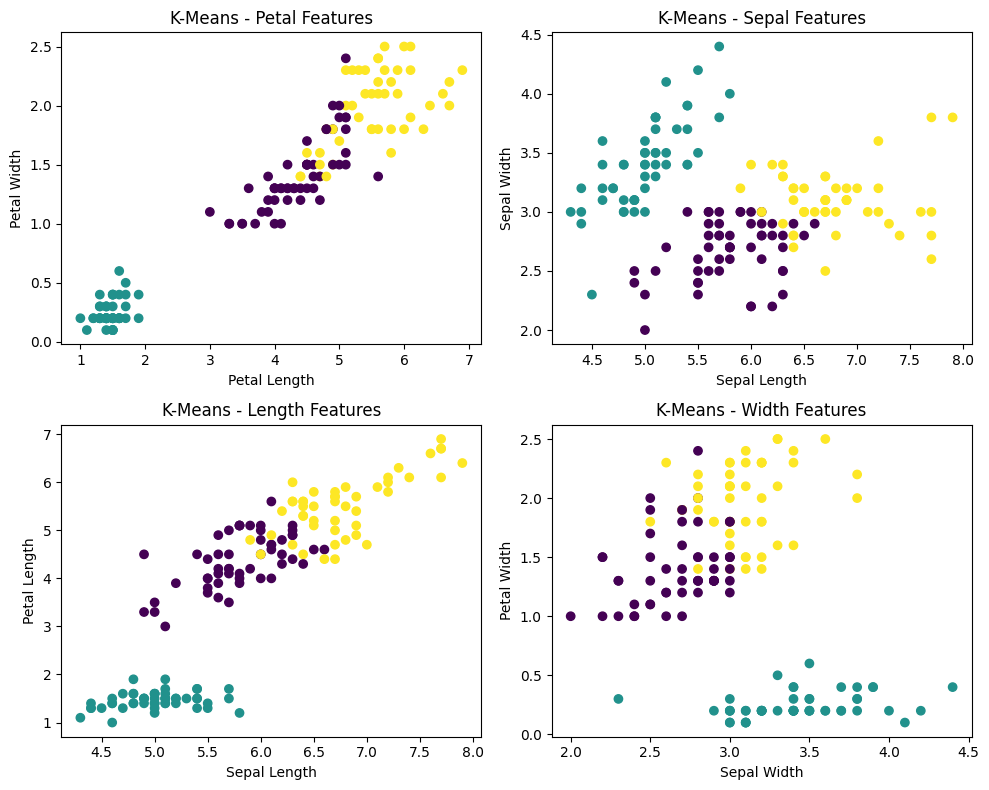

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(features['petal_length'], features['petal_width'], c=kmeans_labels, cmap='viridis')
axes[0, 0].set_xlabel('Petal Length')
axes[0, 0].set_ylabel('Petal Width')
axes[0, 0].set_title('K-Means - Petal Features')

axes[0, 1].scatter(features['sepal_length'], features['sepal_width'], c=kmeans_labels, cmap='viridis')
axes[0, 1].set_xlabel('Sepal Length')
axes[0, 1].set_ylabel('Sepal Width')
axes[0, 1].set_title('K-Means - Sepal Features')

axes[1, 0].scatter(features['sepal_length'], features['petal_length'], c=kmeans_labels, cmap='viridis')
axes[1, 0].set_xlabel('Sepal Length')
axes[1, 0].set_ylabel('Petal Length')
axes[1, 0].set_title('K-Means - Length Features')

axes[1, 1].scatter(features['sepal_width'], features['petal_width'], c=kmeans_labels, cmap='viridis')
axes[1, 1].set_xlabel('Sepal Width')
axes[1, 1].set_ylabel('Petal Width')
axes[1, 1].set_title('K-Means - Width Features')

plt.tight_layout()
plt.show()

### 4. Agrupamento Hierárquico

#### 4.1 Construindo o Dendrograma

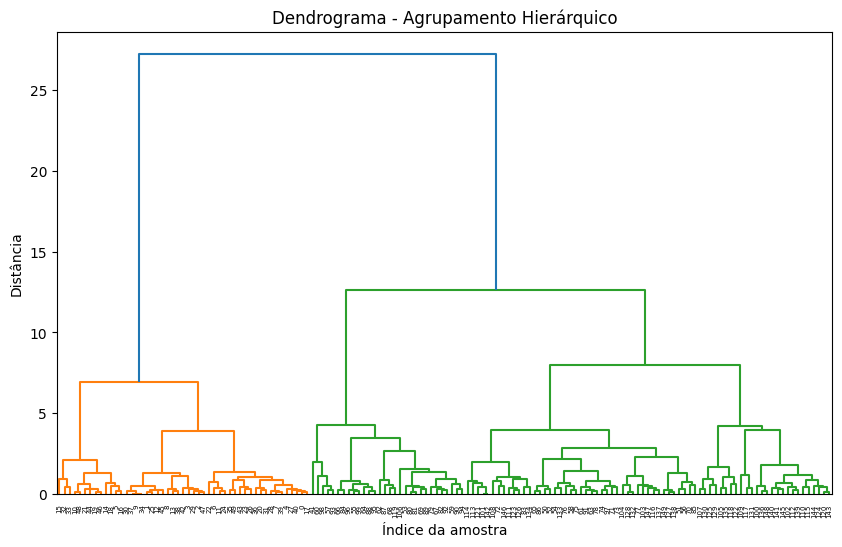

In [9]:
linkage_matrix = linkage(features_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma - Agrupamento Hierárquico')
plt.xlabel('Índice da amostra')
plt.ylabel('Distância')
plt.show()

#### 4.2 Aplicando Agrupamento Hierárquico com 3 clusters

In [10]:
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(features_scaled)

#### 4.3 Visualizando os clusters do Agrupamento Hierárquico

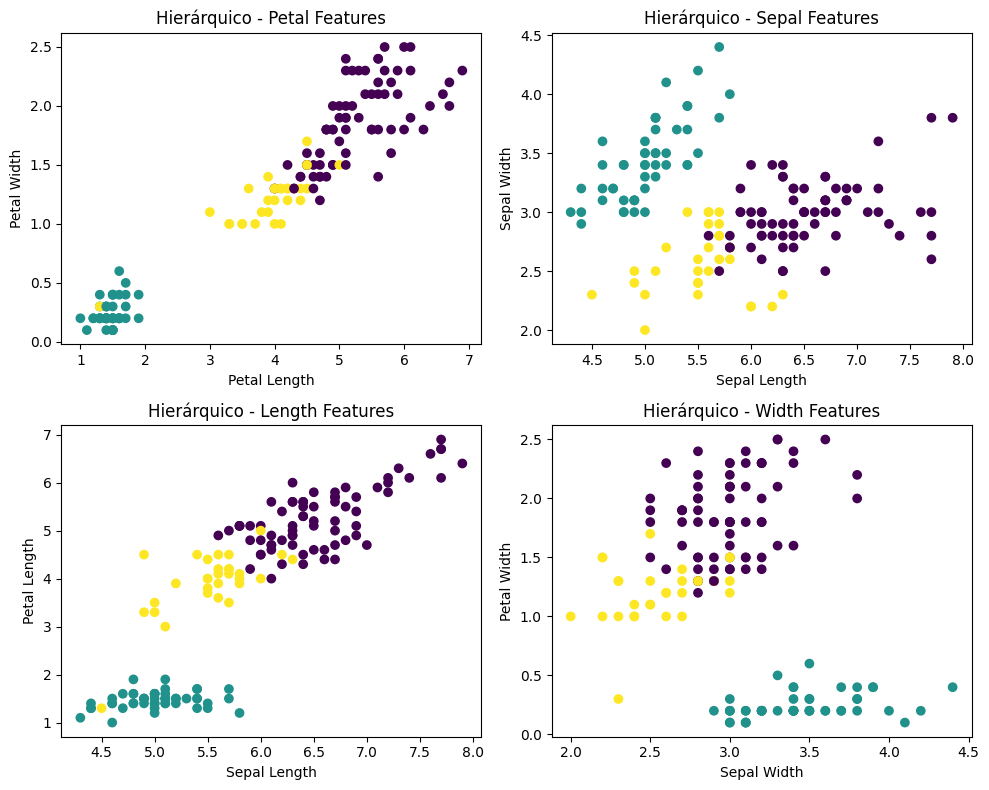

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(features['petal_length'], features['petal_width'], c=hierarchical_labels, cmap='viridis')
axes[0, 0].set_xlabel('Petal Length')
axes[0, 0].set_ylabel('Petal Width')
axes[0, 0].set_title('Hierárquico - Petal Features')

axes[0, 1].scatter(features['sepal_length'], features['sepal_width'], c=hierarchical_labels, cmap='viridis')
axes[0, 1].set_xlabel('Sepal Length')
axes[0, 1].set_ylabel('Sepal Width')
axes[0, 1].set_title('Hierárquico - Sepal Features')

axes[1, 0].scatter(features['sepal_length'], features['petal_length'], c=hierarchical_labels, cmap='viridis')
axes[1, 0].set_xlabel('Sepal Length')
axes[1, 0].set_ylabel('Petal Length')
axes[1, 0].set_title('Hierárquico - Length Features')

axes[1, 1].scatter(features['sepal_width'], features['petal_width'], c=hierarchical_labels, cmap='viridis')
axes[1, 1].set_xlabel('Sepal Width')
axes[1, 1].set_ylabel('Petal Width')
axes[1, 1].set_title('Hierárquico - Width Features')

plt.tight_layout()
plt.show()

### 5. Avaliação dos Resultados

#### 5.1 Calculando métricas de avaliação

In [12]:
le = LabelEncoder()
true_labels_encoded = le.fit_transform(true_labels)

kmeans_ari = adjusted_rand_score(true_labels_encoded, kmeans_labels)
kmeans_silhouette = silhouette_score(features_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(features_scaled, kmeans_labels)

hier_ari = adjusted_rand_score(true_labels_encoded, hierarchical_labels)
hier_silhouette = silhouette_score(features_scaled, hierarchical_labels)
hier_davies = davies_bouldin_score(features_scaled, hierarchical_labels)

print("K-Means:")
print(f"ARI: {kmeans_ari:.3f}")
print(f"Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Davies-Bouldin Score: {kmeans_davies:.3f}")
print("\nAgrupamento Hierárquico:")
print(f"ARI: {hier_ari:.3f}")
print(f"Silhouette Score: {hier_silhouette:.3f}")
print(f"Davies-Bouldin Score: {hier_davies:.3f}")

K-Means:
ARI: 0.620
Silhouette Score: 0.459
Davies-Bouldin Score: 0.835

Agrupamento Hierárquico:
ARI: 0.615
Silhouette Score: 0.446
Davies-Bouldin Score: 0.806


#### 5.2 Comparando com as classes reais

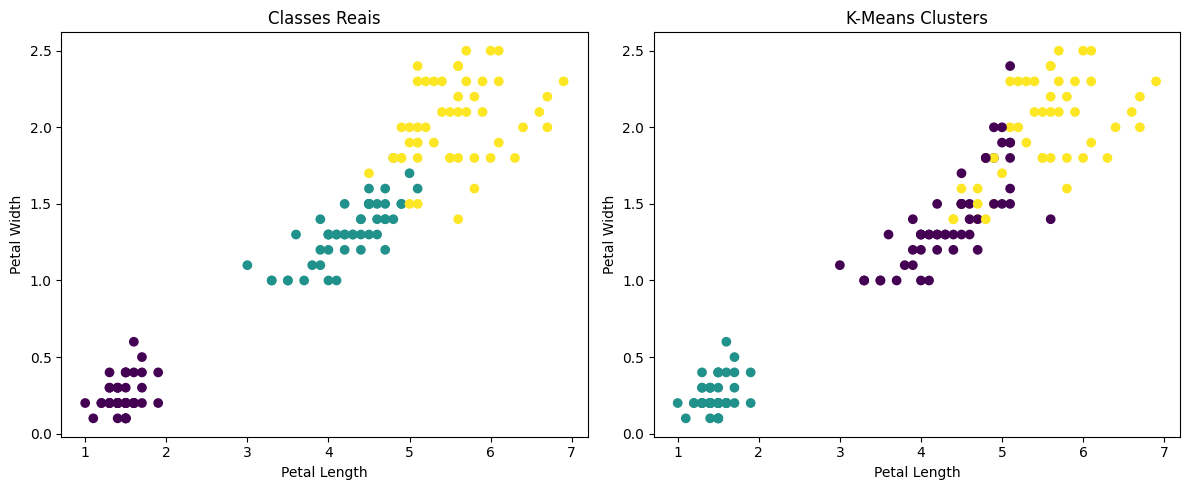

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(features['petal_length'], features['petal_width'], c=true_labels_encoded, cmap='viridis')
ax1.set_xlabel('Petal Length')
ax1.set_ylabel('Petal Width')
ax1.set_title('Classes Reais')

ax2.scatter(features['petal_length'], features['petal_width'], c=kmeans_labels, cmap='viridis')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')
ax2.set_title('K-Means Clusters')

plt.tight_layout()
plt.show()

**Discussão:** O K-Means conseguiu separar bem as três espécies, especialmente quando olhamos as features de pétala. A espécie que forma um grupo isolado (provavelmente Iris-setosa) foi perfeitamente identificada. As outras duas espécies (provavelmente Iris-versicolor e Iris-virginica) têm alguma sobreposição, tornando-as mais difíceis de separar.

O dendrograma mostra uma estrutura hierárquica clara: primeiro se separa um grupo principal (Iris-setosa), e depois os outros dois grupos se separam em um nível mais alto de distância.

### 6. Clustering com apenas 2 features

Vamos repetir a análise usando apenas comprimento e largura da pétala.

In [14]:
features_2d = features[['petal_length', 'petal_width']]
features_2d_scaled = scaler.fit_transform(features_2d)

kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_2d_labels = kmeans_2d.fit_predict(features_2d_scaled)

hier_2d = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_2d_labels = hier_2d.fit_predict(features_2d_scaled)

In [15]:
kmeans_2d_ari = adjusted_rand_score(true_labels_encoded, kmeans_2d_labels)
kmeans_2d_silhouette = silhouette_score(features_2d_scaled, kmeans_2d_labels)
kmeans_2d_davies = davies_bouldin_score(features_2d_scaled, kmeans_2d_labels)

hier_2d_ari = adjusted_rand_score(true_labels_encoded, hier_2d_labels)
hier_2d_silhouette = silhouette_score(features_2d_scaled, hier_2d_labels)
hier_2d_davies = davies_bouldin_score(features_2d_scaled, hier_2d_labels)

print("K-Means (2 features):")
print(f"ARI: {kmeans_2d_ari:.3f}")
print(f"Silhouette Score: {kmeans_2d_silhouette:.3f}")
print(f"Davies-Bouldin Score: {kmeans_2d_davies:.3f}")
print("\nHierárquico (2 features):")
print(f"ARI: {hier_2d_ari:.3f}")
print(f"Silhouette Score: {hier_2d_silhouette:.3f}")
print(f"Davies-Bouldin Score: {hier_2d_davies:.3f}")

K-Means (2 features):
ARI: 0.886
Silhouette Score: 0.674
Davies-Bouldin Score: 0.475

Hierárquico (2 features):
ARI: 0.636
Silhouette Score: 0.609
Davies-Bouldin Score: 0.501


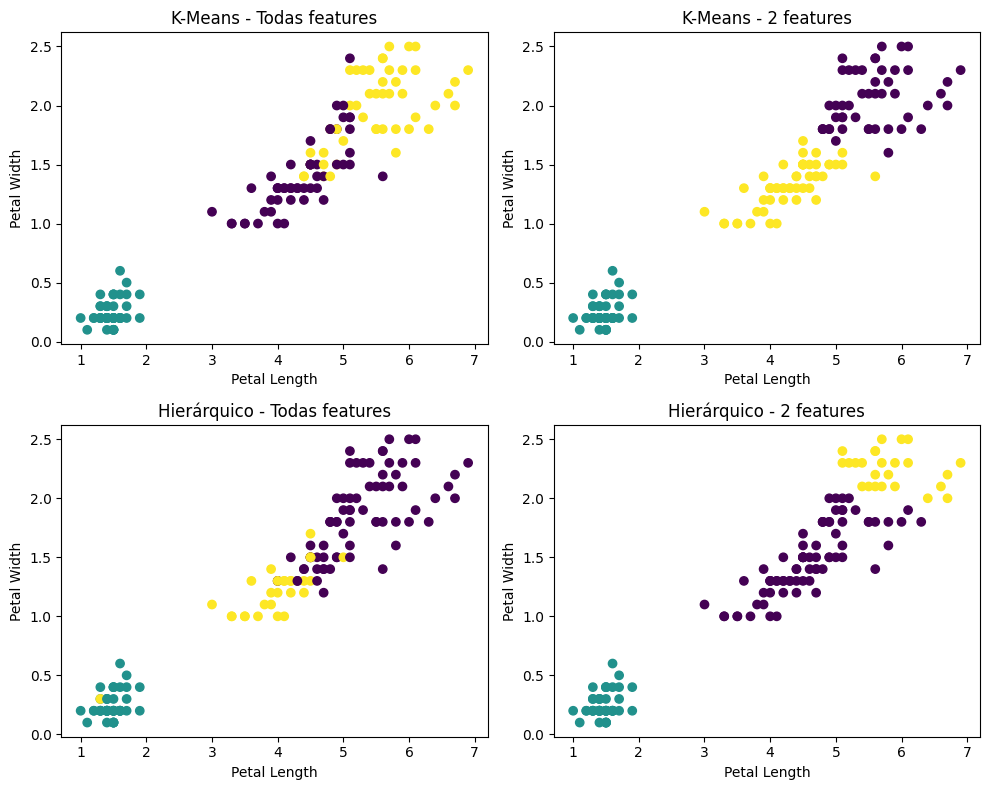

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(features_2d['petal_length'], features_2d['petal_width'], c=kmeans_labels, cmap='viridis')
axes[0, 0].set_title('K-Means - Todas features')
axes[0, 0].set_xlabel('Petal Length')
axes[0, 0].set_ylabel('Petal Width')

axes[0, 1].scatter(features_2d['petal_length'], features_2d['petal_width'], c=kmeans_2d_labels, cmap='viridis')
axes[0, 1].set_title('K-Means - 2 features')
axes[0, 1].set_xlabel('Petal Length')
axes[0, 1].set_ylabel('Petal Width')

axes[1, 0].scatter(features_2d['petal_length'], features_2d['petal_width'], c=hierarchical_labels, cmap='viridis')
axes[1, 0].set_title('Hierárquico - Todas features')
axes[1, 0].set_xlabel('Petal Length')
axes[1, 0].set_ylabel('Petal Width')

axes[1, 1].scatter(features_2d['petal_length'], features_2d['petal_width'], c=hier_2d_labels, cmap='viridis')
axes[1, 1].set_title('Hierárquico - 2 features')
axes[1, 1].set_xlabel('Petal Length')
axes[1, 1].set_ylabel('Petal Width')

plt.tight_layout()
plt.show()

### 7. Resumo dos Resultados

Comparando todas as métricas:

In [17]:
resultados = pd.DataFrame({
    'Método': ['K-Means (4 features)', 'Hierárquico (4 features)', 
               'K-Means (2 features)', 'Hierárquico (2 features)'],
    'ARI': [kmeans_ari, hier_ari, kmeans_2d_ari, hier_2d_ari],
    'Silhouette': [kmeans_silhouette, hier_silhouette, kmeans_2d_silhouette, hier_2d_silhouette],
    'Davies-Bouldin': [kmeans_davies, hier_davies, kmeans_2d_davies, hier_2d_davies]
})

print(resultados.to_string(index=False))

                  Método      ARI  Silhouette  Davies-Bouldin
    K-Means (4 features) 0.620135    0.458972        0.835410
Hierárquico (4 features) 0.615323    0.445540        0.805940
    K-Means (2 features) 0.885697    0.673618        0.475294
Hierárquico (2 features) 0.635697    0.609497        0.501175


## Conclusões

1. **Número de clusters:** O método do cotovelo sugeriu k=2 ou k=3. Como sabemos que existem 3 espécies, usamos k=3.

2. **Melhor algoritmo:** O K-Means com apenas 2 features (pétala) teve o melhor desempenho, com ARI mais alto e melhor Silhouette Score.

3. **Separação das espécies:** O K-Means conseguiu separar bem as três espécies. A Iris-setosa é facilmente separável, enquanto Iris-versicolor e Iris-virginica têm alguma sobreposição.

4. **Impacto do número de features:** Usar apenas as features de pétala melhorou significativamente o clustering. Isso mostra que as pétalas são mais discriminativas que as sépalas para diferenciar as espécies de Iris.

5. **Estrutura hierárquica:** O dendrograma revelou que primeiro se separa um grupo principal (Iris-setosa) e depois os outros dois grupos, confirmando que Iris-setosa é bem diferente das outras duas espécies.